# FFT Example 2

In [61]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

## With np.fft.fft2(...)

The function takes two dimension inputs for the filter image; the third parameter is D0, which defines the circle area of the High Pass Filter.



In [62]:
def idealHighPass(M, N, D0):
    # Initializing the filter with ones; 
    # Depending on which library you are calling
    rows, cols = M, N
    crow, ccol = int(rows / 2), int(cols / 2)
    center = (crow, ccol)
    
    mask = np.ones((rows, cols), dtype=np.uint8)
    x, y = np.ogrid[:rows, :cols]
    masked_location = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= D0 ** 2
    mask[masked_location] = 0
    
#     # Scanning through each pixel and calculating the distance of each pixel
#     # to the image center. If the pixel is within D0, it is changed to 0:
#     for i in range(M):
#         for j in range(N):
#             if ((i-M/2) **2 + (j-N/2)**2)**0.5 <= D0:
#                 filter[i,j]= 0
            
    return mask

In [63]:
def ButterworthLowPass(M, N, D0, n_o):
    mask = np.zeros((M, N))
    n_o = 2 * n_o
    
    for i in range(M):
        for j in range(N):
            d = ( (i-M/2)**2 + (j-N/2)**2 )**0.5
            mask[i,j]= 1 / ( 1 + (d/D0)**n_o )
    return mask


In [64]:
ideal_high = idealHighPass(256, 256, 40)
butterworth_low = ButterworthLowPass(256, 256, 40, 2)

cv2.imshow("Ideal", ideal_high * 200)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

cv2.imshow("Butterworth", butterworth_low)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [73]:
# read the image, 0 means reading as gray level
gray = cv2.imread("images/wm74_2.bmp", 0)

# Fourier transform
# output, img_dft, is a complex matrix of the image size
img_dft = np.fft.fft2(gray)

# we need to employ fftshift to bring the lower frequency components 
# to the centre of the frequency domain
dft_shift = np.fft.fftshift(img_dft)  # Move frequency domain from upper left to middle

print(img_dft.shape , type(img_dft), img_dft[0,0])


(427, 639) <class 'numpy.ndarray'> (37763895+0j)


In [74]:
# filtering 
M, N = gray.shape
dft_shift_abs = np.abs(dft_shift)
dft_shift_phase = np.angle(dft_shift) 

# we build a filter, same size of the image and fft
f = ButterworthLowPass(M, N, 60, 3) 
# f = idealHighPass(M, N, 60) 

# filtering, element wise multiplication
dft_shift_abs = np.multiply(dft_shift_abs, f) 
# building the complext matrix after filtering 
z = np.multiply(dft_shift_abs, np.exp((1j) * (dft_shift_phase)) )

In [75]:
# showing the results, filtered image in the fft domain
# Z is a complex matrix, same size of your image, real and imaginary elements can be seen here
print(z)
print(z.shape)

[[ 0.00094775+1.41638350e-03j -0.00196751+2.38123610e-03j
   0.00299347+4.52643026e-05j ... -0.00096646+2.43752747e-03j
  -0.0001273 -7.45857422e-04j  0.00132751-1.94027023e-03j]
 [-0.001589  -1.09150337e-02j -0.00102812+1.75827934e-03j
   0.00090788-1.84527376e-03j ... -0.00069892-4.73062901e-03j
  -0.00057257+8.14095926e-04j -0.00589805+4.74260885e-03j]
 [-0.00368539+5.83086576e-03j -0.00071809-4.90080020e-03j
   0.00016339+1.77757742e-03j ... -0.00356654-2.94196972e-03j
   0.00360259-4.50088506e-03j  0.00461076+1.50305446e-03j]
 ...
 [ 0.00459038-1.49641108e-03j  0.00358675+4.48108928e-03j
  -0.00355093+2.92909501e-03j ...  0.000167  -1.81683848e-03j
  -0.00073391+5.00877265e-03j -0.00376638-5.95900798e-03j]
 [-0.0058723 -4.72190030e-03j -0.00057009-8.10559011e-04j
  -0.0006959 +4.71018114e-03j ...  0.00092792+1.88598799e-03j
  -0.00105074-1.79697745e-03j -0.00162389+1.11546654e-02j]
 [ 0.00132178+1.93190126e-03j -0.00012675+7.42656773e-04j
  -0.00096234-2.42712186e-03j ...  0.00305

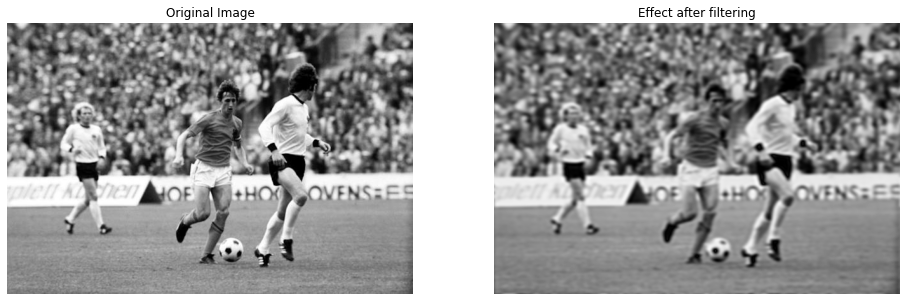

In [78]:
# fftshift used to re-shift the frequency components to their original place
# and make them ready for inverse fft transform
idft_shift = np.fft.ifftshift(z)  #Move the frequency domain from the middle to the upper left corner

# inverset fft, image is back to the spatial domain, abs is necessary since the output of
# inverse fourier, ifft, is complex
ifimg = np.fft.ifft2(idft_shift)  # Fourier library function call
ifimg = np.abs(ifimg)
ifimg = (ifimg / ifimg.max() * 255)

# showing the result
cv2.imshow("ifimg", np.uint8(ifimg))
cv2.imshow("gray", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

# Draw pictures
plt.figure(figsize=(16, 6))
plt.subplot(121), plt.imshow(gray, 'gray'), plt.title('Original Image')
plt.axis('off')

plt.subplot(122), plt.imshow(np.uint8(ifimg), 'gray'), plt.title('Effect after filtering')
plt.axis('off')

plt.show()

## With cv2.dft(...)

In [79]:
# read the image, 0 means reading as gray level
gray = cv2.imread("images/wm74_2.bmp", 0)

# Fourier transform
# output, img_dft, is a complex matrix of the image size
img_dft = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

# we need to employ fftshift to bring the lower frequency components 
# to the centre of the frequency domain
dft_shift = np.fft.fftshift(img_dft)  # Move frequency domain from upper left to middle

print(img_dft.shape , type(img_dft), img_dft[0, 0])

(427, 639, 2) <class 'numpy.ndarray'> [3.7763896e+07 9.7656250e-02]


In [80]:
def idealHighPassCV2(M, N, D0):
    # Initializing the filter with ones; 
    # Depending on which library you are calling
    rows, cols = M, N
    crow, ccol = int(rows / 2), int(cols / 2)
    center = (crow, ccol)
    
    mask = np.ones((rows, cols, 2), dtype=np.uint8)
    x, y = np.ogrid[:rows, :cols]
    masked_location = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= D0 ** 2
    mask[masked_location] = 0
            
    return mask

In [85]:
M, N = gray.shape

f = idealHighPassCV2(M, N, 60)

z = f * dft_shift

idft_shift = np.fft.ifftshift(z)

ifimg = cv2.idft(idft_shift)

ifimg = cv2.magnitude(ifimg[:, :, 0], ifimg[:, :, 1])

ifimg = ifimg / ifimg.max() * 255

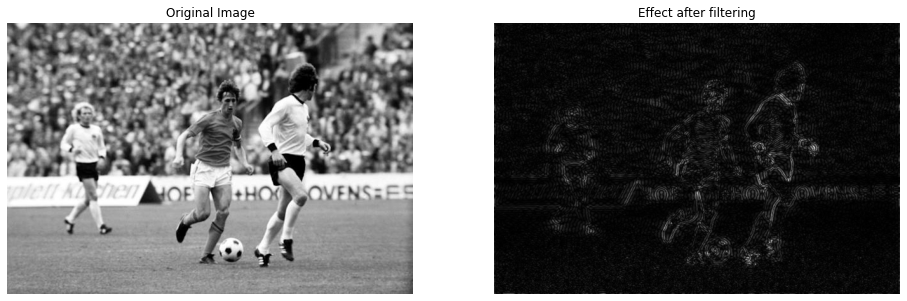

In [87]:
# showing the result
cv2.imshow("ifimg", np.uint8(ifimg))
cv2.imshow("gray", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

# Draw pictures
plt.figure(figsize=(16, 6))
plt.subplot(121), plt.imshow(gray, 'gray'), plt.title('Original Image')
plt.axis('off')

plt.subplot(122), plt.imshow(ifimg, 'gray'), plt.title('Effect after filtering')
plt.axis('off')

plt.show()